# Data integration script
## Integrate all previous KRAB and P300 datasets (singlets)
#### Visualise cell populations and gRNA distribution

#### batch names are b2 and b3, matching with batch 1 and batch 2 in the manuscript
#### the b1 tag was allocated to the pilot run

In [1]:
#load packages
suppressMessages({
    library(dplyr)
    library(tidyverse)

    #library(networkD3)
    library(ggplot2)
    library(ggrepel)
    #library(pheatmap)
    #library(grid)
    library(RColorBrewer)
    #library(viridis)
    #library(cowplot)
    #library(hrbrthemes)
    #library(GGally)
    library(plotly)
    #library(circlize)
    #library(scCustomize)
    library(patchwork)
    
    library(Seurat)
    library(SeuratWrappers)
    library(scales)
    #library(reshape2)
    library(stringr)
    #library(magrittr)
    library(reticulate)
    library(harmony)
    library(batchelor)
})


#for regulating plot sizes
pdim<-function(x,y){
    return(options(repr.plot.width=x, repr.plot.height=y))
}


In [2]:
color_palette_60 <- c(
  "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
  "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
  "#393b79", "#637939", "#8c6d31", "#843c39", "#7b4173",
  "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
  "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
  "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
  "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9",
  "#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00",
  "#ffff33", "#a65628", "#f781bf", "#999999", "#66c2a5",
  "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f",
  "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02", "#7570b3",
  "#e7298a", "#66a61e", "#e6ab02", "#a6761d", "#666666"
)


In [3]:
obj2024<-readRDS(".../2024July_Karl_CRISPRscreen_Singlet_objlist_AddedReads_ClusterCleaned.rds")

obj2025_krab<-readRDS(".../2025Feb_Karl_CRISPRscreen_KRAB_Singlet_update.rds")
obj2025_P300<-readRDS(".../2025Feb_Karl_CRISPRscreen_P300_Singlet_objlist.rds")

In [5]:
names<-c(
       "b2_krab_ctrl","b2_krab_ifn",
       "b2_p300_ctrl","b2_p300_ifn",
       "b3_krab_ctrl", 
        "b3_p300_ctrl", "b3_p300_ifn")


obj_list_all<-list(
                     obj2024[[1]],obj2024[[2]],obj2024[[3]],obj2024[[4]], 
                     obj2025_krab, 
                   obj2025_P300[[3]], obj2025_P300[[4]]
                  )

names(obj_list_all)<-names

In [6]:
colnames(obj_list_all[[1]]@meta.data)

[1] "orig.ident"               "nCount_RNA"              
 [3] "nFeature_RNA"             "nCount_GDO"              
 [5] "nFeature_GDO"             "percent.mt"              
 [7] "guide_state"              "guide_name"              
 [9] "guide_counts"             "CellID"                  
[11] "zscore_guide_state"       "zscore_guide_calling"    
[13] "zscore_feature_calling"   "S.Score"                 
[15] "G2M.Score"                "Phase"                   
[17] "old.ident"                "CC.Difference"           
[19] "RNA_snn_res.0.5"          "seurat_clusters"         
[21] "gene"                     "NT"                      
[23] "crispr"                   "mixscape_class"          
[25] "mixscape_class_p_perturb" "mixscape_class.global"

## sychronise all meta data column names
### set default assay to RNA for integration analysis

### caution: remove batch 1 (no analysis run from the pilot exp)

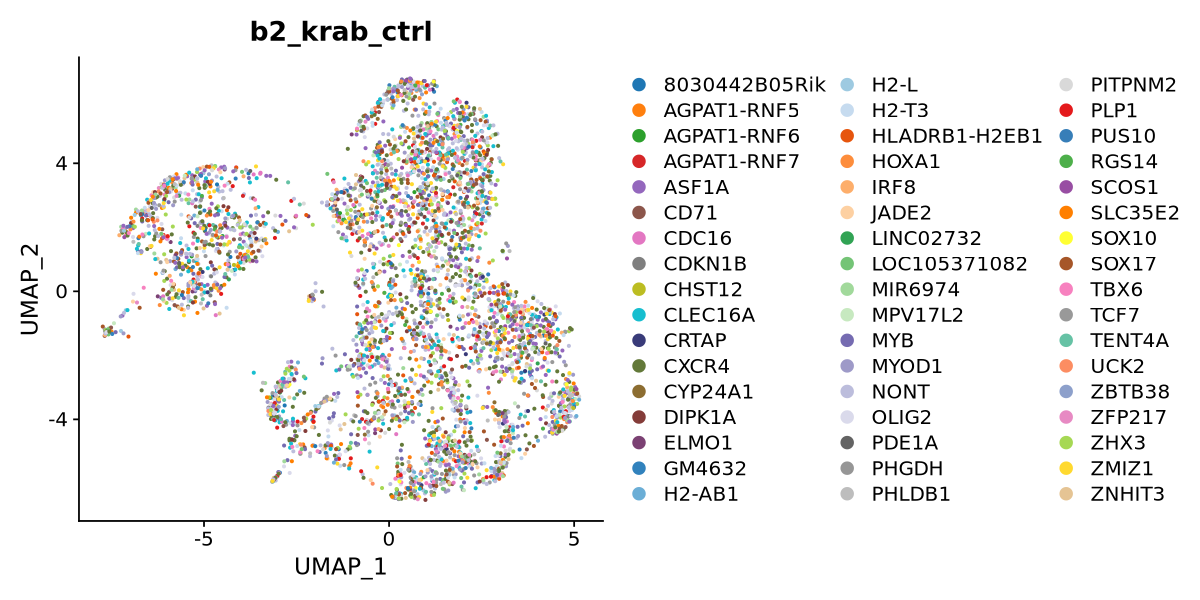

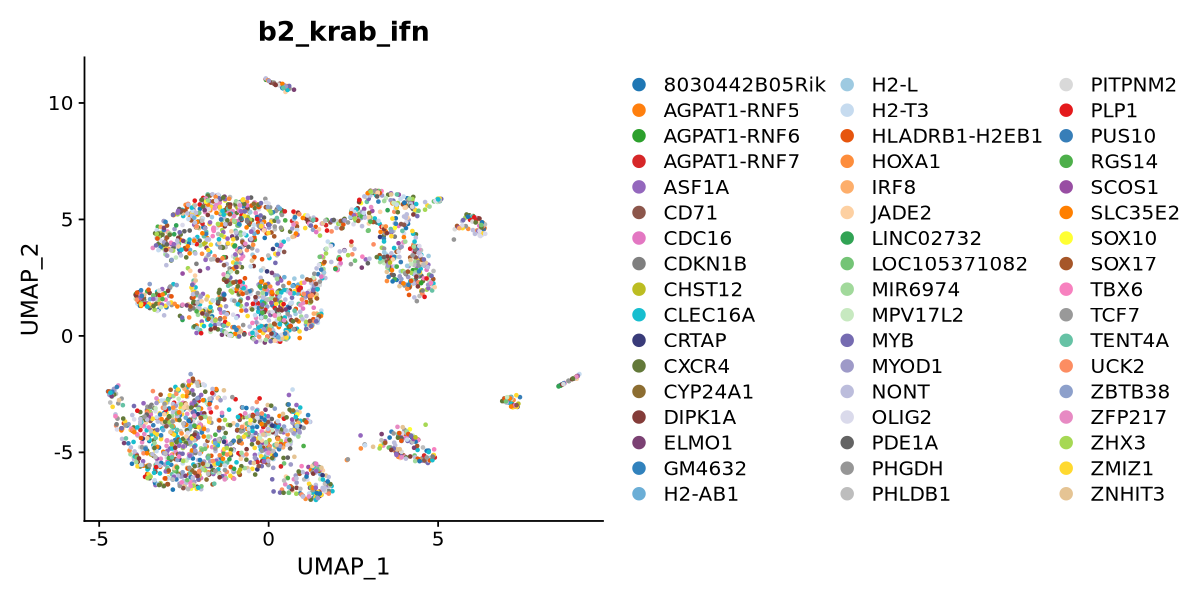

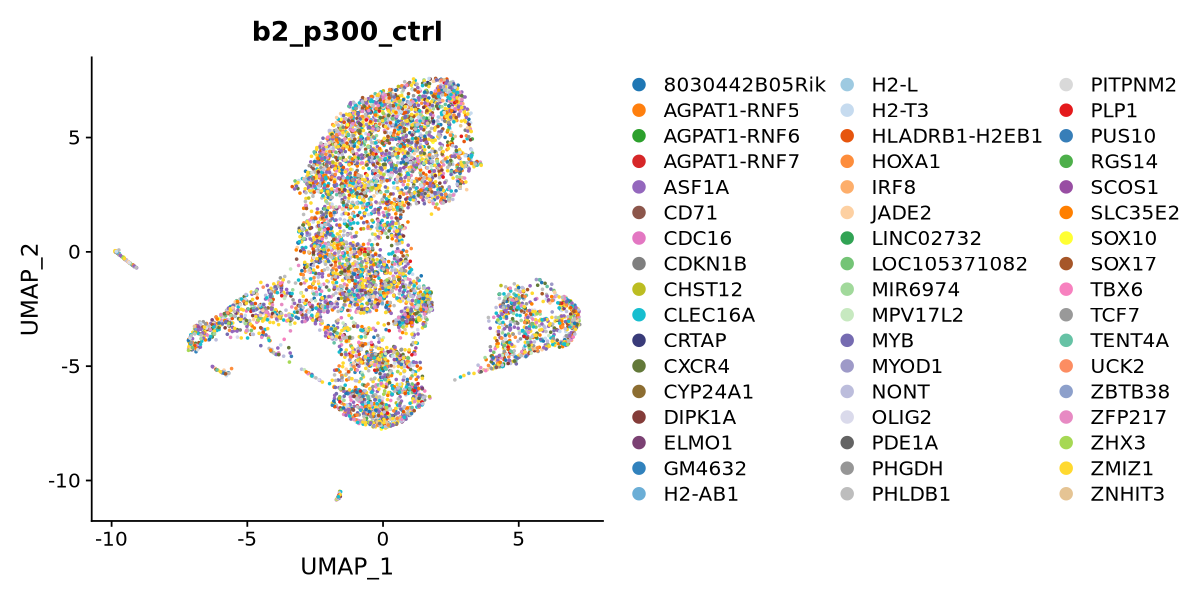

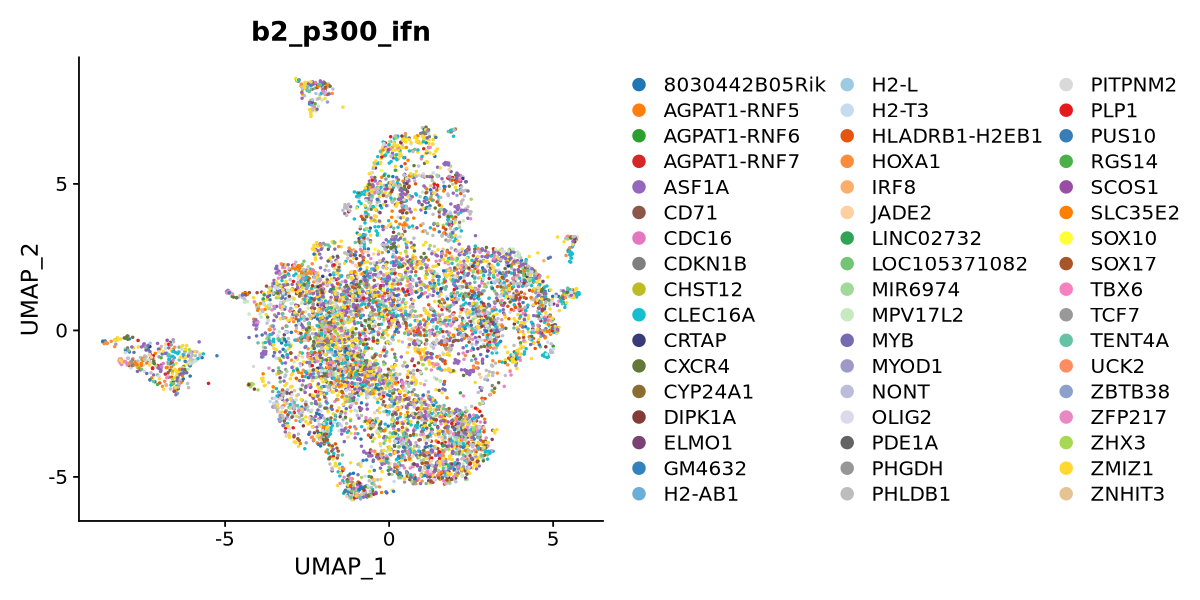

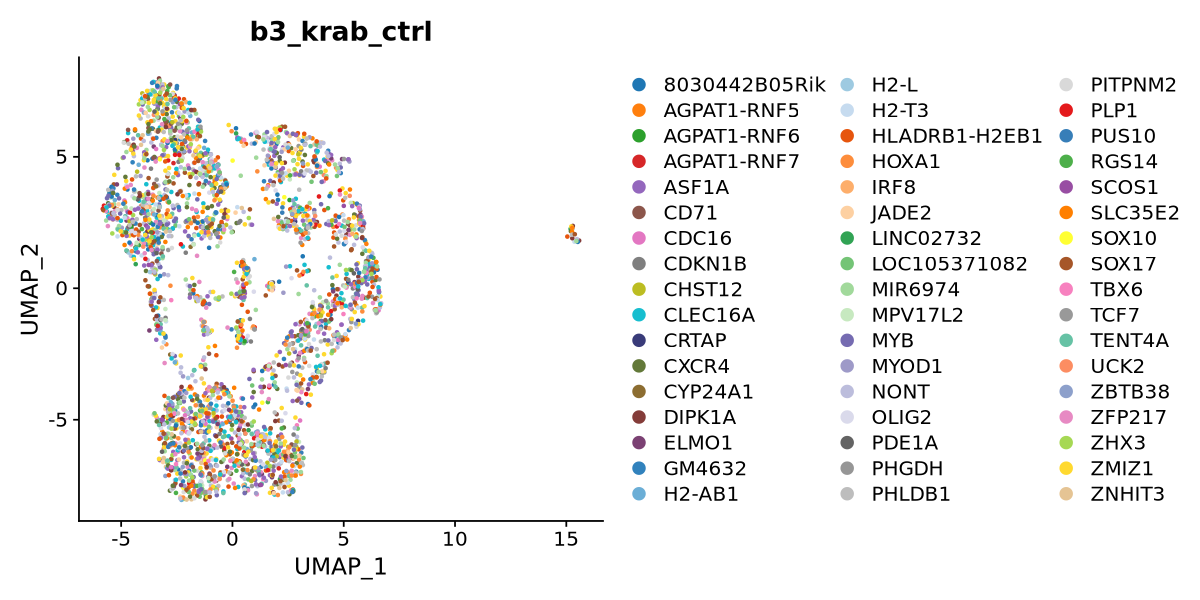

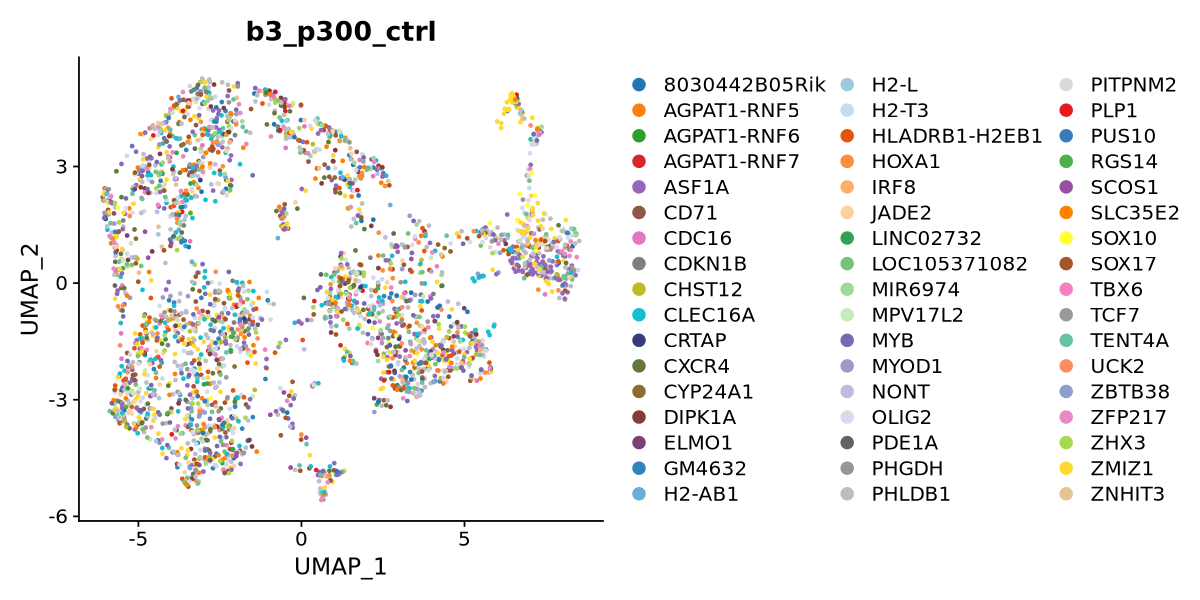

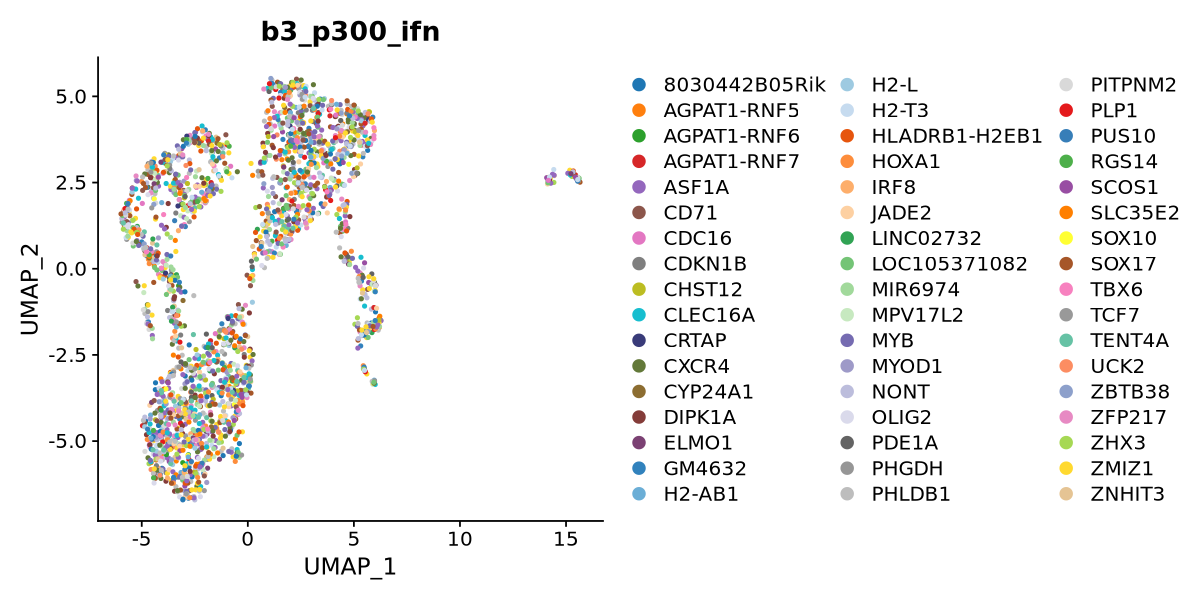

In [7]:
for(i in 1:7){
    batch<-strsplit(names[[i]], "_")[[1]][1]
    perturb<-strsplit(names[[i]], "_")[[1]][2]
    treatment<-strsplit(names[[i]], "_")[[1]][3]
    
    obj_tmp<-obj_list_all[[i]]

    DefaultAssay(obj_tmp)<-"RNA"
    
    obj_tmp@meta.data$grna<-obj_tmp@meta.data[, 
                                              grep("feature_calling", 
                                                   colnames(obj_tmp@meta.data))]
    
    pdim(10,5)
    print(DimPlot(obj_tmp, group.by = "grna", 
        label = FALSE, repel = TRUE, cols = color_palette_60)+
          ggtitle(names[[i]]))

    obj_tmp@meta.data$Sample_ID<-names[[i]]
    obj_tmp@meta.data$batch<-batch
    obj_tmp@meta.data$perturb<-perturb
    obj_tmp@meta.data$treatment<-treatment

    obj_list_all[[i]]<-obj_tmp
}

In [8]:
obj_list_all

$b2_krab_ctrl
An object of class Seurat 
40757 features across 4398 samples within 3 assays 
Active assay: RNA (38606 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: GDO, PRTB
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

$b2_krab_ifn
An object of class Seurat 
40757 features across 3053 samples within 3 assays 
Active assay: RNA (38606 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: GDO, PRTB
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

$b2_p300_ctrl
An object of class Seurat 
40757 features across 6798 samples within 3 assays 
Active assay: RNA (38606 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: GDO, PRTB
 4 dimensional reductions calculated: pca, umap, prtbpca, prtbumap

$b2_p300_ifn
An object of class Seurat 
40757 features across 7790 samples within 3 assays 
Active assay

## merge all data into a single object and seperate into 9 data layers

In [9]:
obj<-Reduce(function(x,y) merge(x,y) , 
            obj_list_all)

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [10]:
obj

An object of class Seurat 
43089 features across 30452 samples within 3 assays 
Active assay: RNA (38606 features, 0 variable features)
 2 layers present: counts, data
 2 other assays present: GDO, PRTB

In [11]:
obj[["RNA"]] <- split(obj[["RNA"]], f = obj$batch)
obj

Warning message:
“Input is a v3 assay and `split()` only works for v5 assays; converting
• to a v5 assay”
Warning message:
“Assay RNA changing from Assay to Assay5”


An object of class Seurat 
43089 features across 30452 samples within 3 assays 
Active assay: RNA (38606 features, 0 variable features)
 4 layers present: counts.b2, counts.b3, data.b2, data.b3
 2 other assays present: GDO, PRTB

In [12]:
obj <- SCTransform(obj) %>%
       RunPCA(.)

Running SCTransform on assay: RNA

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 30114 by 22039

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 327 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 30114 genes

Computing corrected count matrix for 30114 genes

Calculating gene attributes

Wall clock passed: Time difference of 3.175515 mins

Determine variable features

Centering data matrix

Place corrected count matr

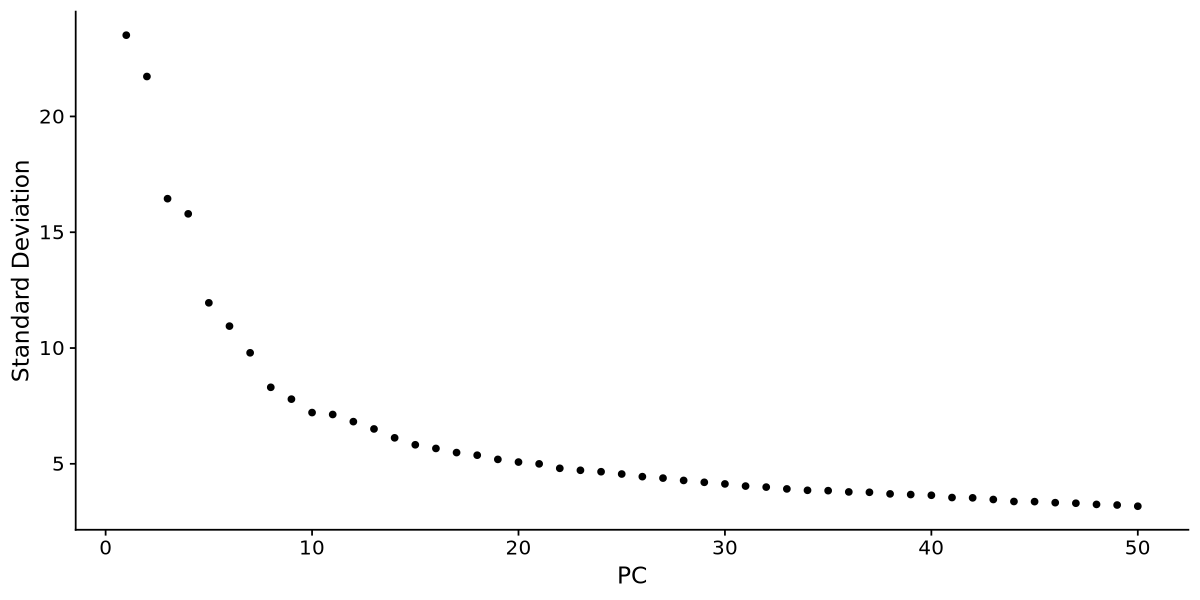

In [13]:
pdim(10,5)
ElbowPlot(obj, ndims = 50)

## Obeserve unintegrated clusters

In [14]:
obj <- FindNeighbors(obj, dims = 1:30, reduction = "pca")
obj <- FindClusters(obj, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 30452
Number of edges: 1056025

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8515
Number of communities: 41
Elapsed time: 3 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


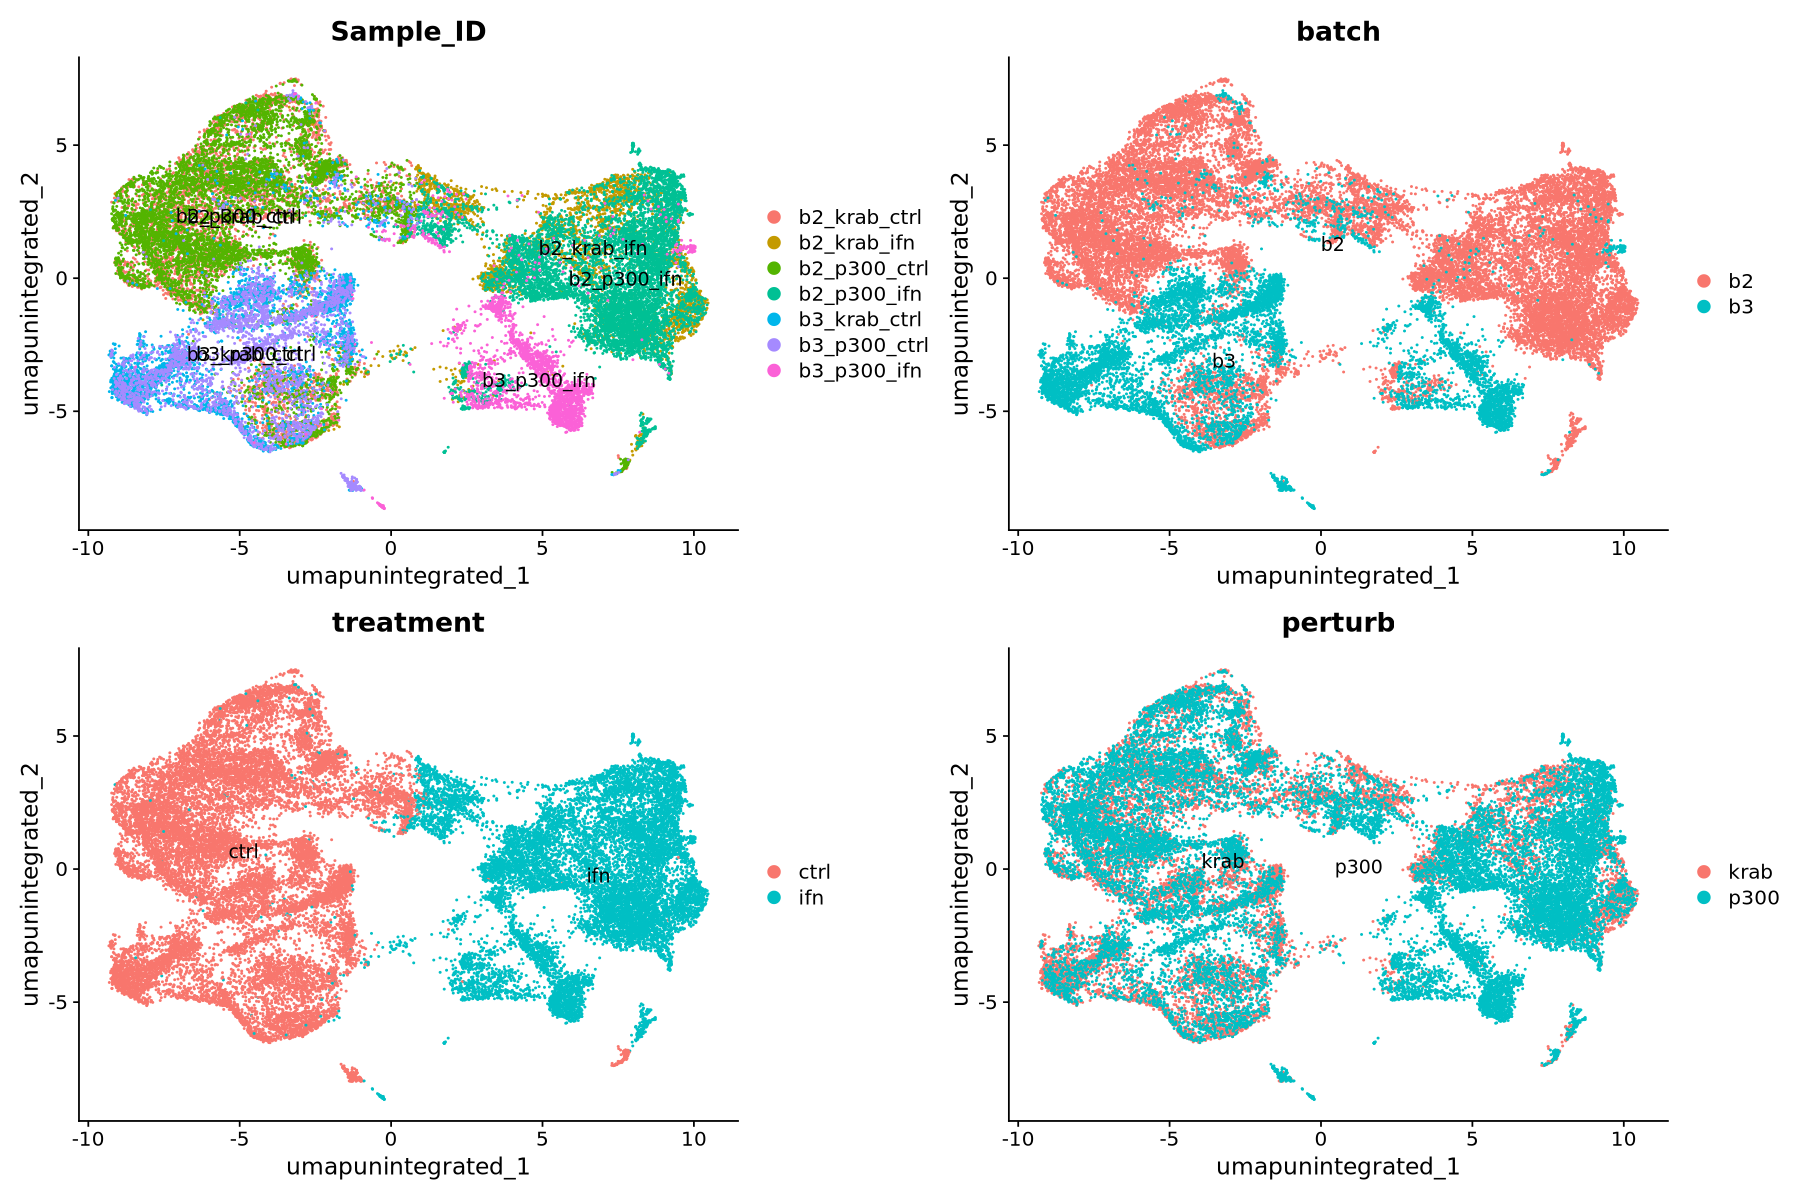

In [15]:
obj <- RunUMAP(obj, dims = 1:30, reduction = "pca", reduction.name = "umap.unintegrated", verbose = FALSE)

pdim(15,10)
DimPlot(obj, reduction = "umap.unintegrated", group.by = c("Sample_ID", "batch", "treatment", "perturb"), 
        ncol = 2, label = TRUE)

## Perform intergration analysis with all avalible methods

##### note: rpca is excluded since the data is not too big and the method is less accurate

In [16]:
obj <- IntegrateLayers(
  object = obj, method = CCAIntegration,
    normalization.method = "SCT",
  orig.reduction = "pca", new.reduction = "integrated.cca",
  verbose = TRUE
)

obj <- IntegrateLayers(
  object = obj, method = HarmonyIntegration,
    normalization.method = "SCT",
  orig.reduction = "pca", new.reduction = "harmony",
  verbose = TRUE
)


Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 22344 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

The `features` argument is ignored by `HarmonyIntegration`.
This message is displayed once per session.
Transposing data matrix

Using automatic lambda estimation

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



In [17]:
#time consuming step fast mnn
#obj <- IntegrateLayers(
#    object = obj, method = FastMNNIntegration,
#    #normalization.method = "SCT",
#  new.reduction = "integrated.mnn",
#  verbose = TRUE
#)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 30452
Number of edges: 1082355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 40
Elapsed time: 4 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 30452
Number of edges: 1066225

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8345
Number of communities: 39
Elapsed time: 4 seconds


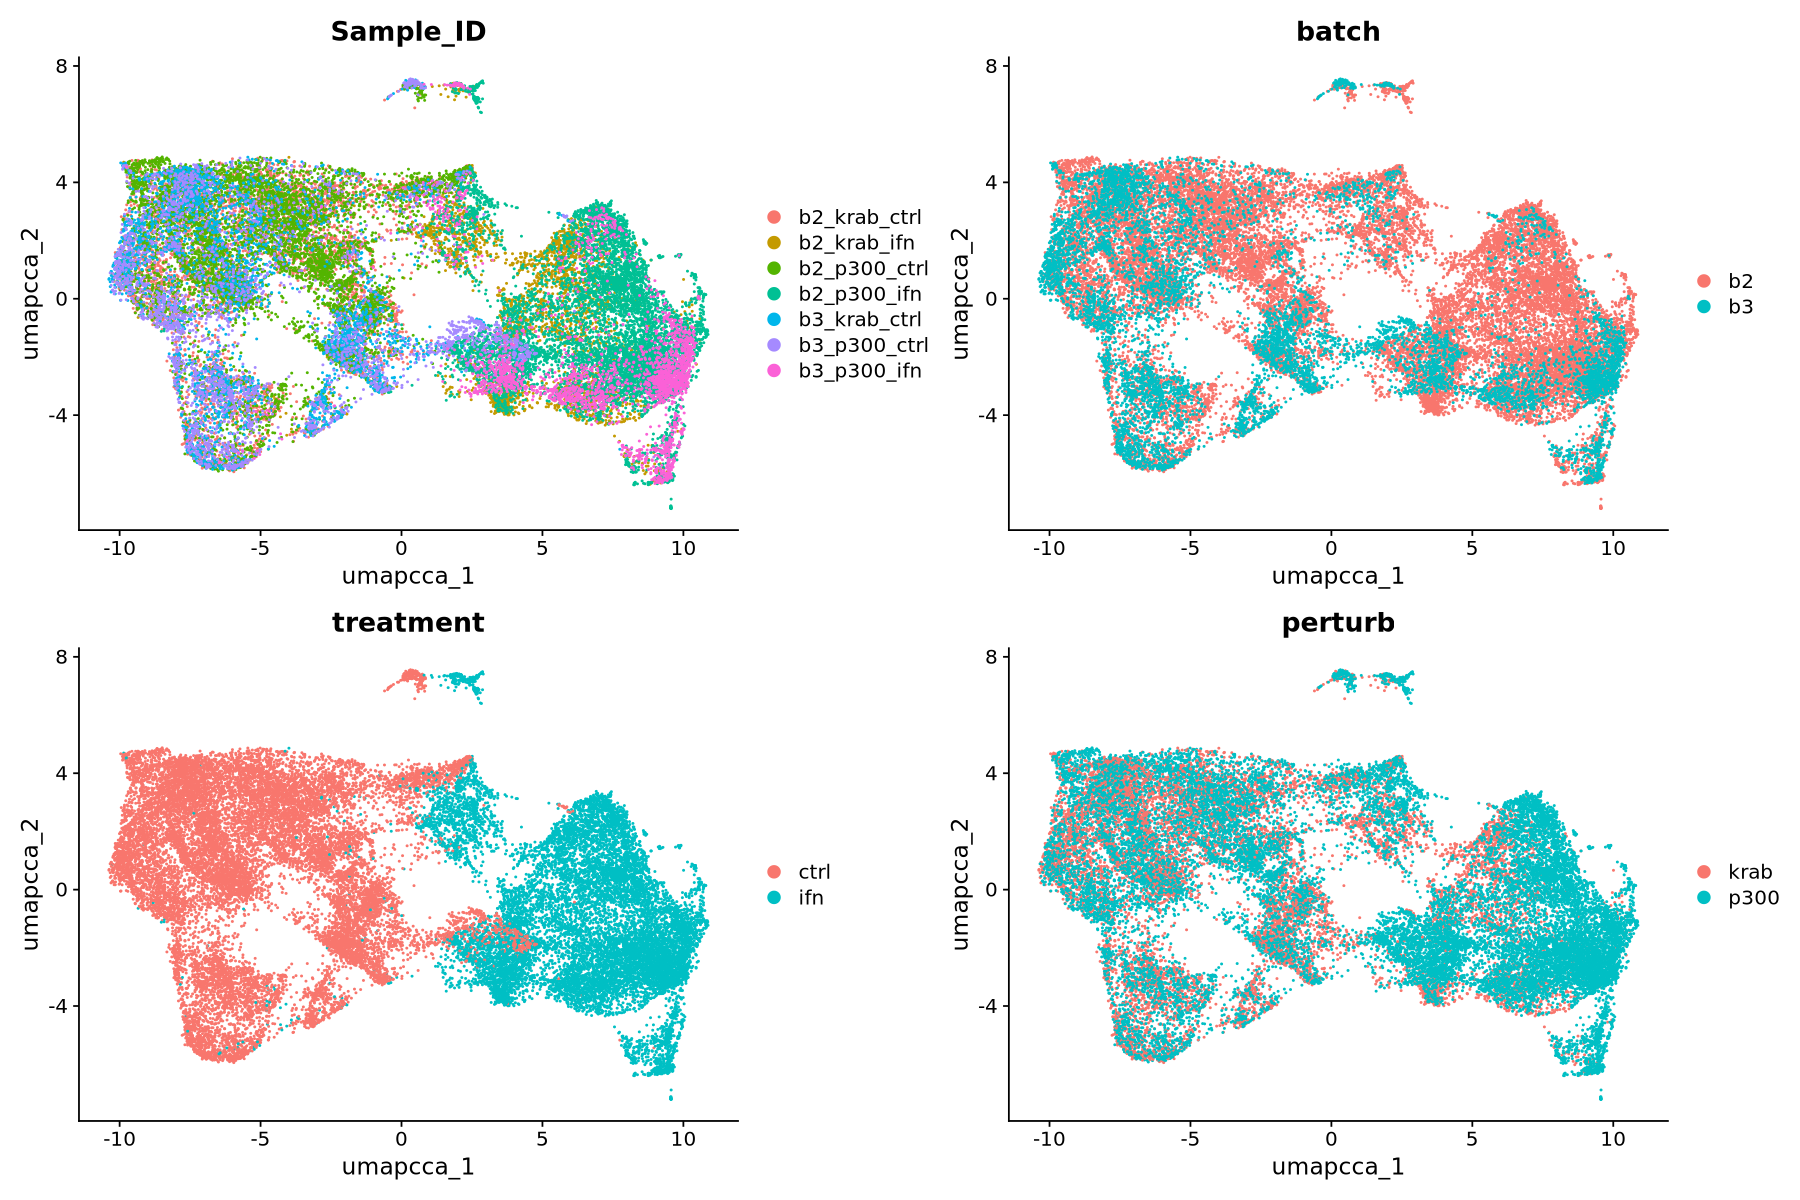

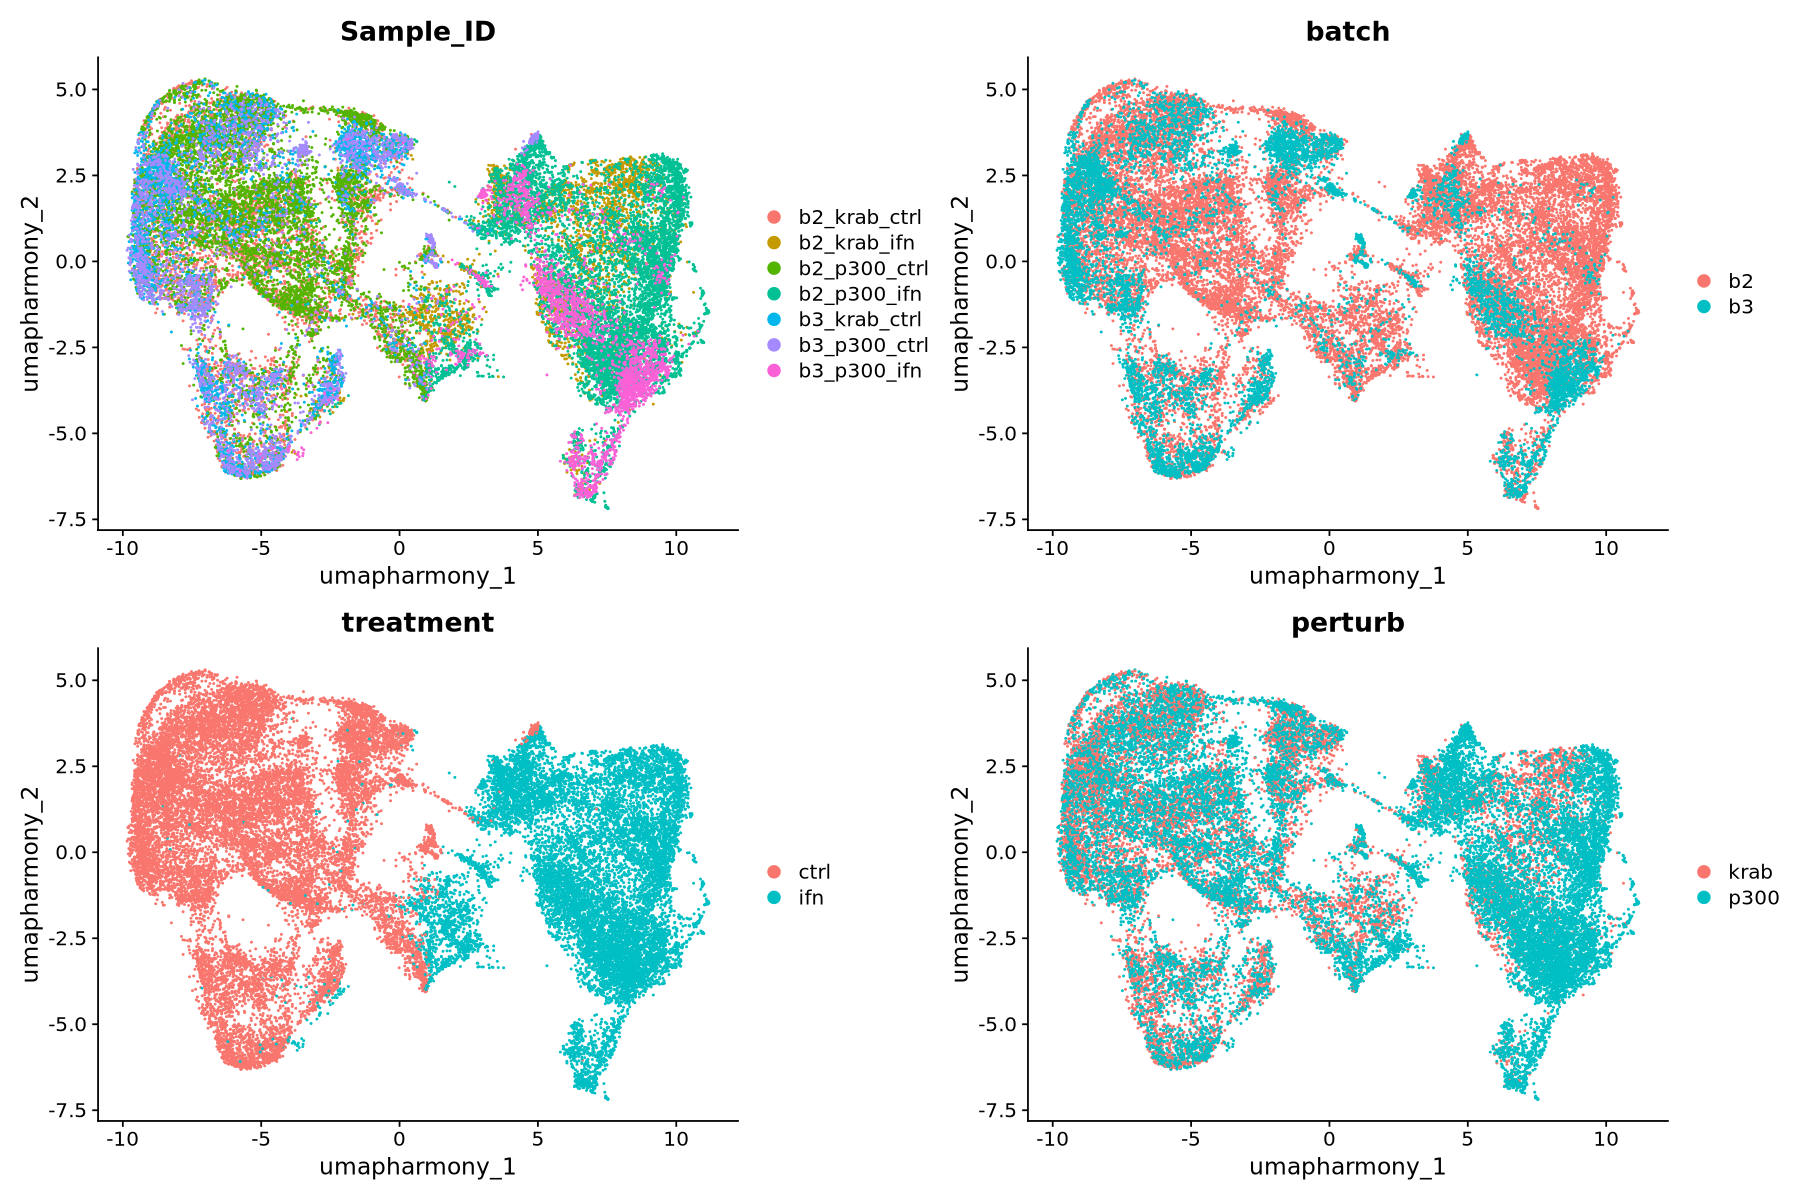

In [19]:
int.method<-c("integrated.cca", "harmony","integrated.mnn" 
              #, "integrated.scvi"
             )
int_brief_name<-c("cca", "harmony", "mnn"
                  #, "scvi"
                 )
intplot.list<-list()

for(k in 1:2){
    obj <- FindNeighbors(obj, reduction = int.method[[k]], dims = 1:30)
    obj <- FindClusters(obj, resolution = 2, cluster.name = paste0(int_brief_name[[k]], "_clusters"))

    obj <- RunUMAP(obj, reduction = int.method[[k]], dims = 1:30, reduction.name = paste0("umap.",int_brief_name[[k]]),
                  verbose = FALSE)

    print(DimPlot(obj, reduction = paste0("umap.",int_brief_name[[k]]),
                          group.by = c("Sample_ID", "batch", "treatment", "perturb"),
                          label.size = 2, ncol=2)
          )
}

In [20]:
obj

An object of class Seurat 
73233 features across 30452 samples within 4 assays 
Active assay: SCT (30144 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: RNA, GDO, PRTB
 6 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, harmony, umap.cca, umap.harmony

In [22]:
sessionInfo()

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: AlmaLinux 8.10 (Cerulean Leopard)

Matrix products: default
BLAS/LAPACK: /home/ting/miniconda3/envs/seu5_int/lib/libopenblasp-r0.3.30.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Stockholm
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] future_1.58.0               batchelor_1.22.0           
 [3] SingleCellExperiment_1.28.0 SummarizedExperiment_1.36.0
 [5] Biobase_2.66.0              GenomicRanges_1.58.0       
 [7] GenomeInfoDb_